In [3]:
import numpy as np

import wf_psf

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import seaborn as sns


In [4]:
def define_plot_style():
    # Define plot paramters
    # Use seaborn style
    sns.set()
    
    plot_style = {
        'figure.figsize': (12,8),
        'figure.dpi': 200,
        'figure.autolayout':True,
        'lines.linewidth': 2,
        'lines.linestyle': '-',
        'lines.marker': 'o',
        'lines.markersize': 10,
        'legend.fontsize': 20,
        'legend.loc': 'best',
        'axes.titlesize': 24,
        'font.size': 22
    }
    mpl.rcParams.update(plot_style)

In [17]:
metrics_file = '../wf-outputs/metrics/metrics-poly_full_poly_{}_stars.npy'

saving_folder ='../figures/'

In [6]:
n_stars_list = [500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
metrics_dict_list = [np.load(metrics_file.format(n_stars), allow_pickle=True)[()] for n_stars in n_stars_list]

In [7]:
polyc_rmse, polyc_std_rmse, polyc_rel_rmse, polyc_std_rel_rmse = wf_psf.script_utils.extract_poly_results(metrics_dict_list)

In [8]:
e1, e2, R2 = wf_psf.script_utils.extract_shape_results(metrics_dict_list)

In [9]:
pix_rmse, pix_std_rmse, pix_rel_rmse, pix_std_rel_rmse = wf_psf.script_utils.extract_shape_pix_results(metrics_dict_list)

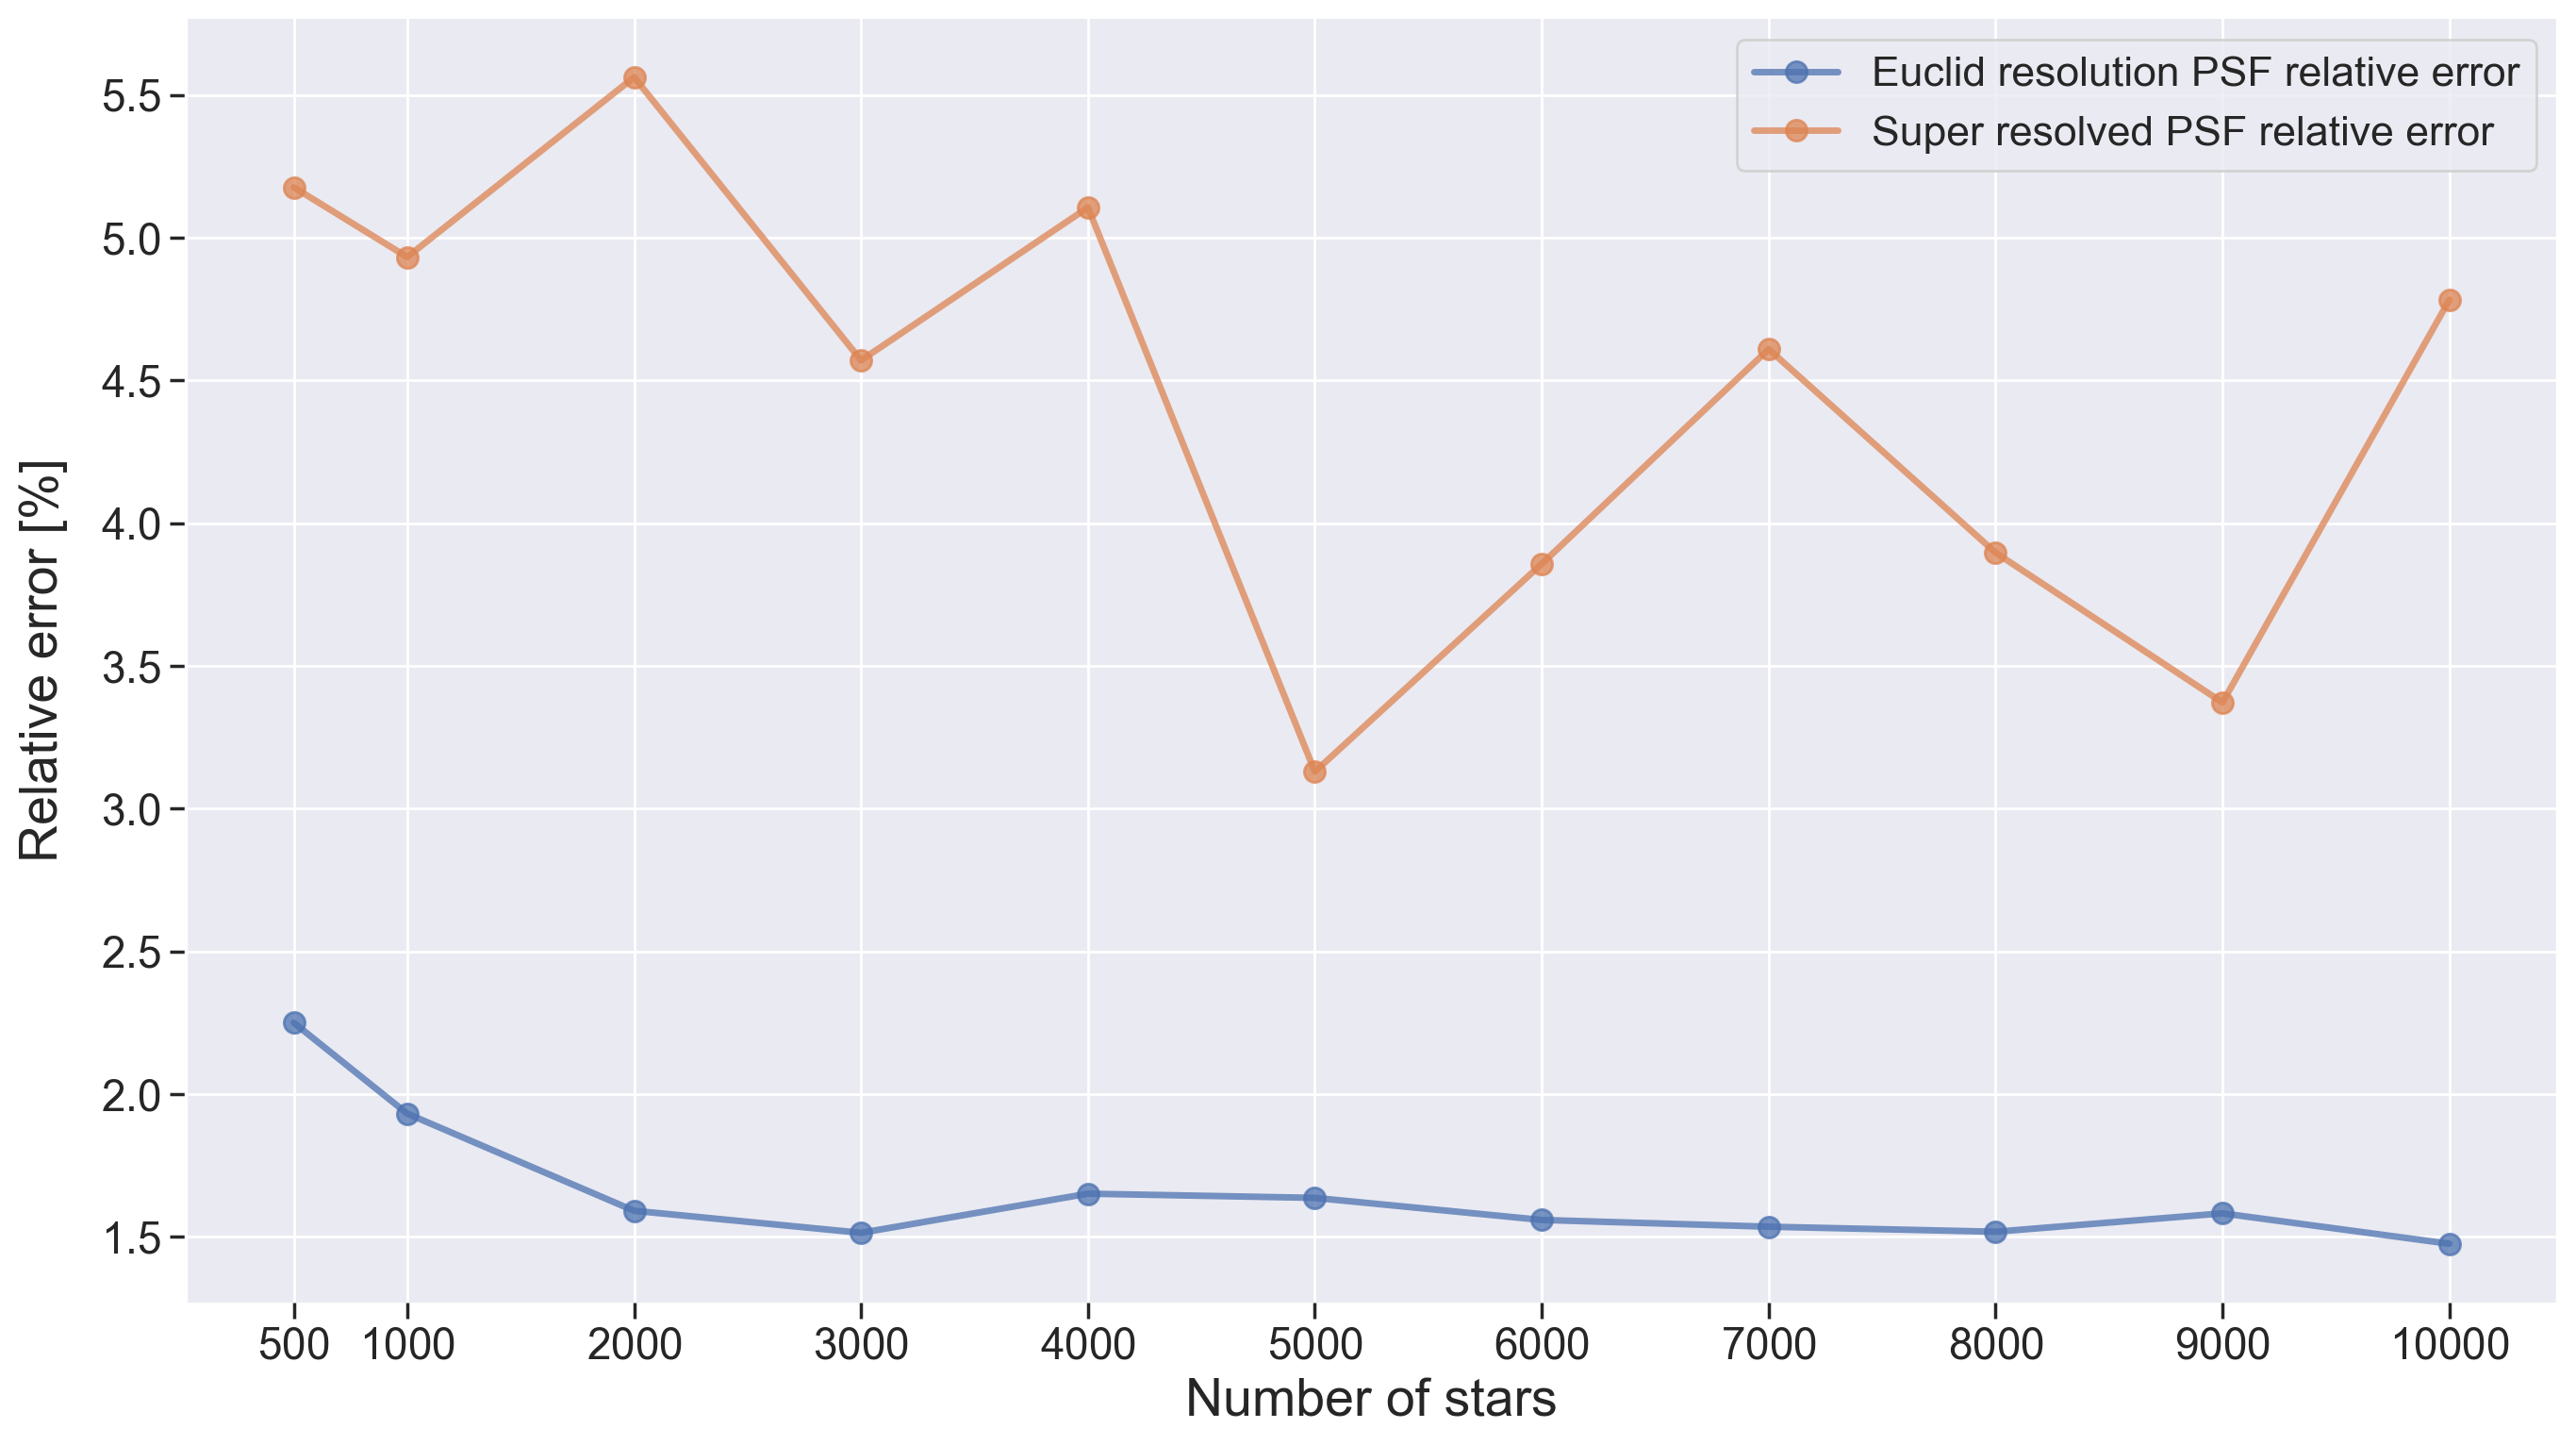

In [18]:
# Define style
define_plot_style()
star_list = n_stars_list
sns.set(font_scale=1.5)


fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot()

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

ax1.plot(star_list, polyc_rel_rmse, label='Euclid resolution PSF relative error', **kwargs)
ax1.plot(star_list, pix_rel_rmse, label='Super resolved PSF relative error', **kwargs)

ax1.legend(prop={'size': 16})#, loc='upper right')

plt.xticks(star_list)


ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()


# plt.minorticks_on()
ax1.yaxis.major.formatter._useMathText = True
ax1.xaxis.major.formatter._useMathText = True

ax1.set_ylabel('Relative error [%]', fontsize = 20)   
ax1.yaxis.set_label_coords(-0.05,0.5, transform=ax1.transAxes)
ax1.set_xlabel('Number of stars', fontsize = 20)


#plt.savefig(saving_folder + 'SR_PixRMSE_vs_NbStars.pdf')
plt.show()

# Shape metrics

In [14]:
euclid_requirement_e1 = 2e-4
euclid_requirement_e2 = 2e-4
euclid_requirement_R2 = 1e-3

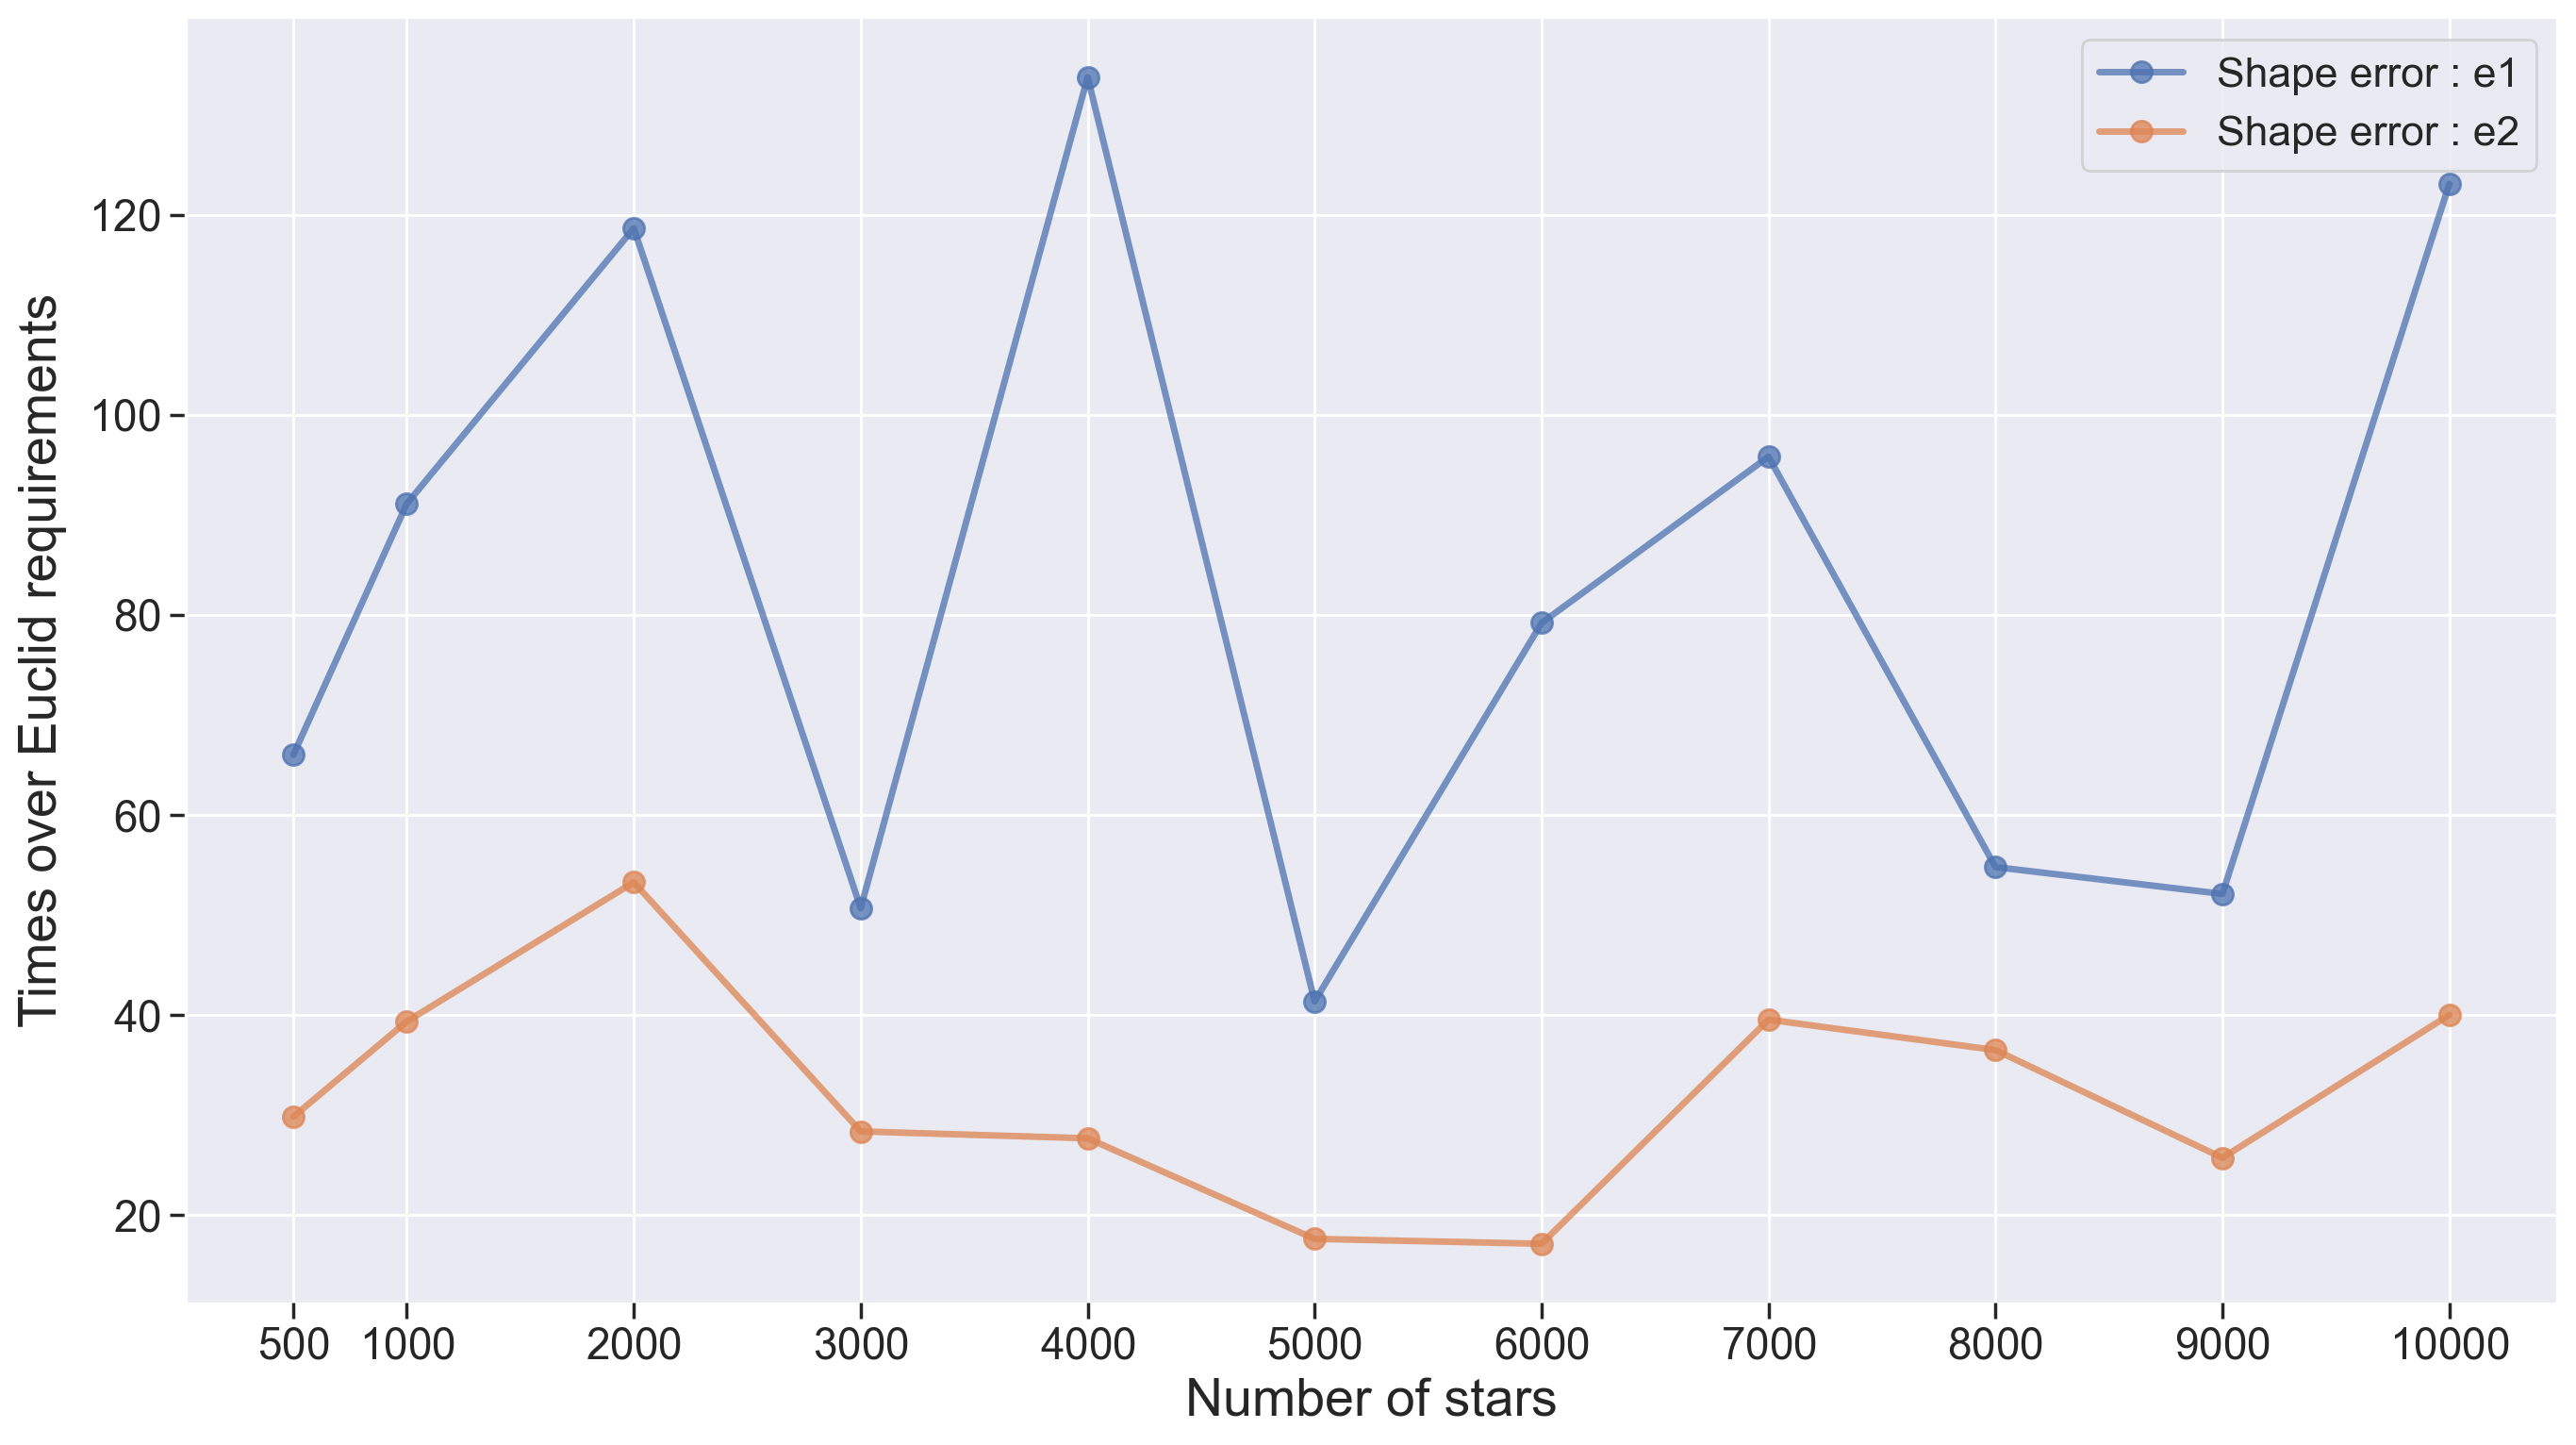

In [22]:
# Define style
define_plot_style()
star_list = n_stars_list
sns.set(font_scale=1.5)


fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot()

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

ax1.plot(star_list, e1[0]/euclid_requirement_e1, label='Shape error : e1', **kwargs)
ax1.plot(star_list, e2[0]/euclid_requirement_e2, label='Shape error : e2', **kwargs)

ax1.legend(prop={'size': 16})#, loc='upper right')

plt.xticks(star_list)


ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()


# plt.minorticks_on()
ax1.yaxis.major.formatter._useMathText = True
ax1.xaxis.major.formatter._useMathText = True

ax1.set_ylabel('Times over Euclid requirements', fontsize = 20)   
ax1.yaxis.set_label_coords(-0.05,0.5, transform=ax1.transAxes)
ax1.set_xlabel('Number of stars', fontsize = 20)


plt.savefig(saving_folder + 'e1_e2_RMSE_vs_NbStars.pdf')
plt.show()

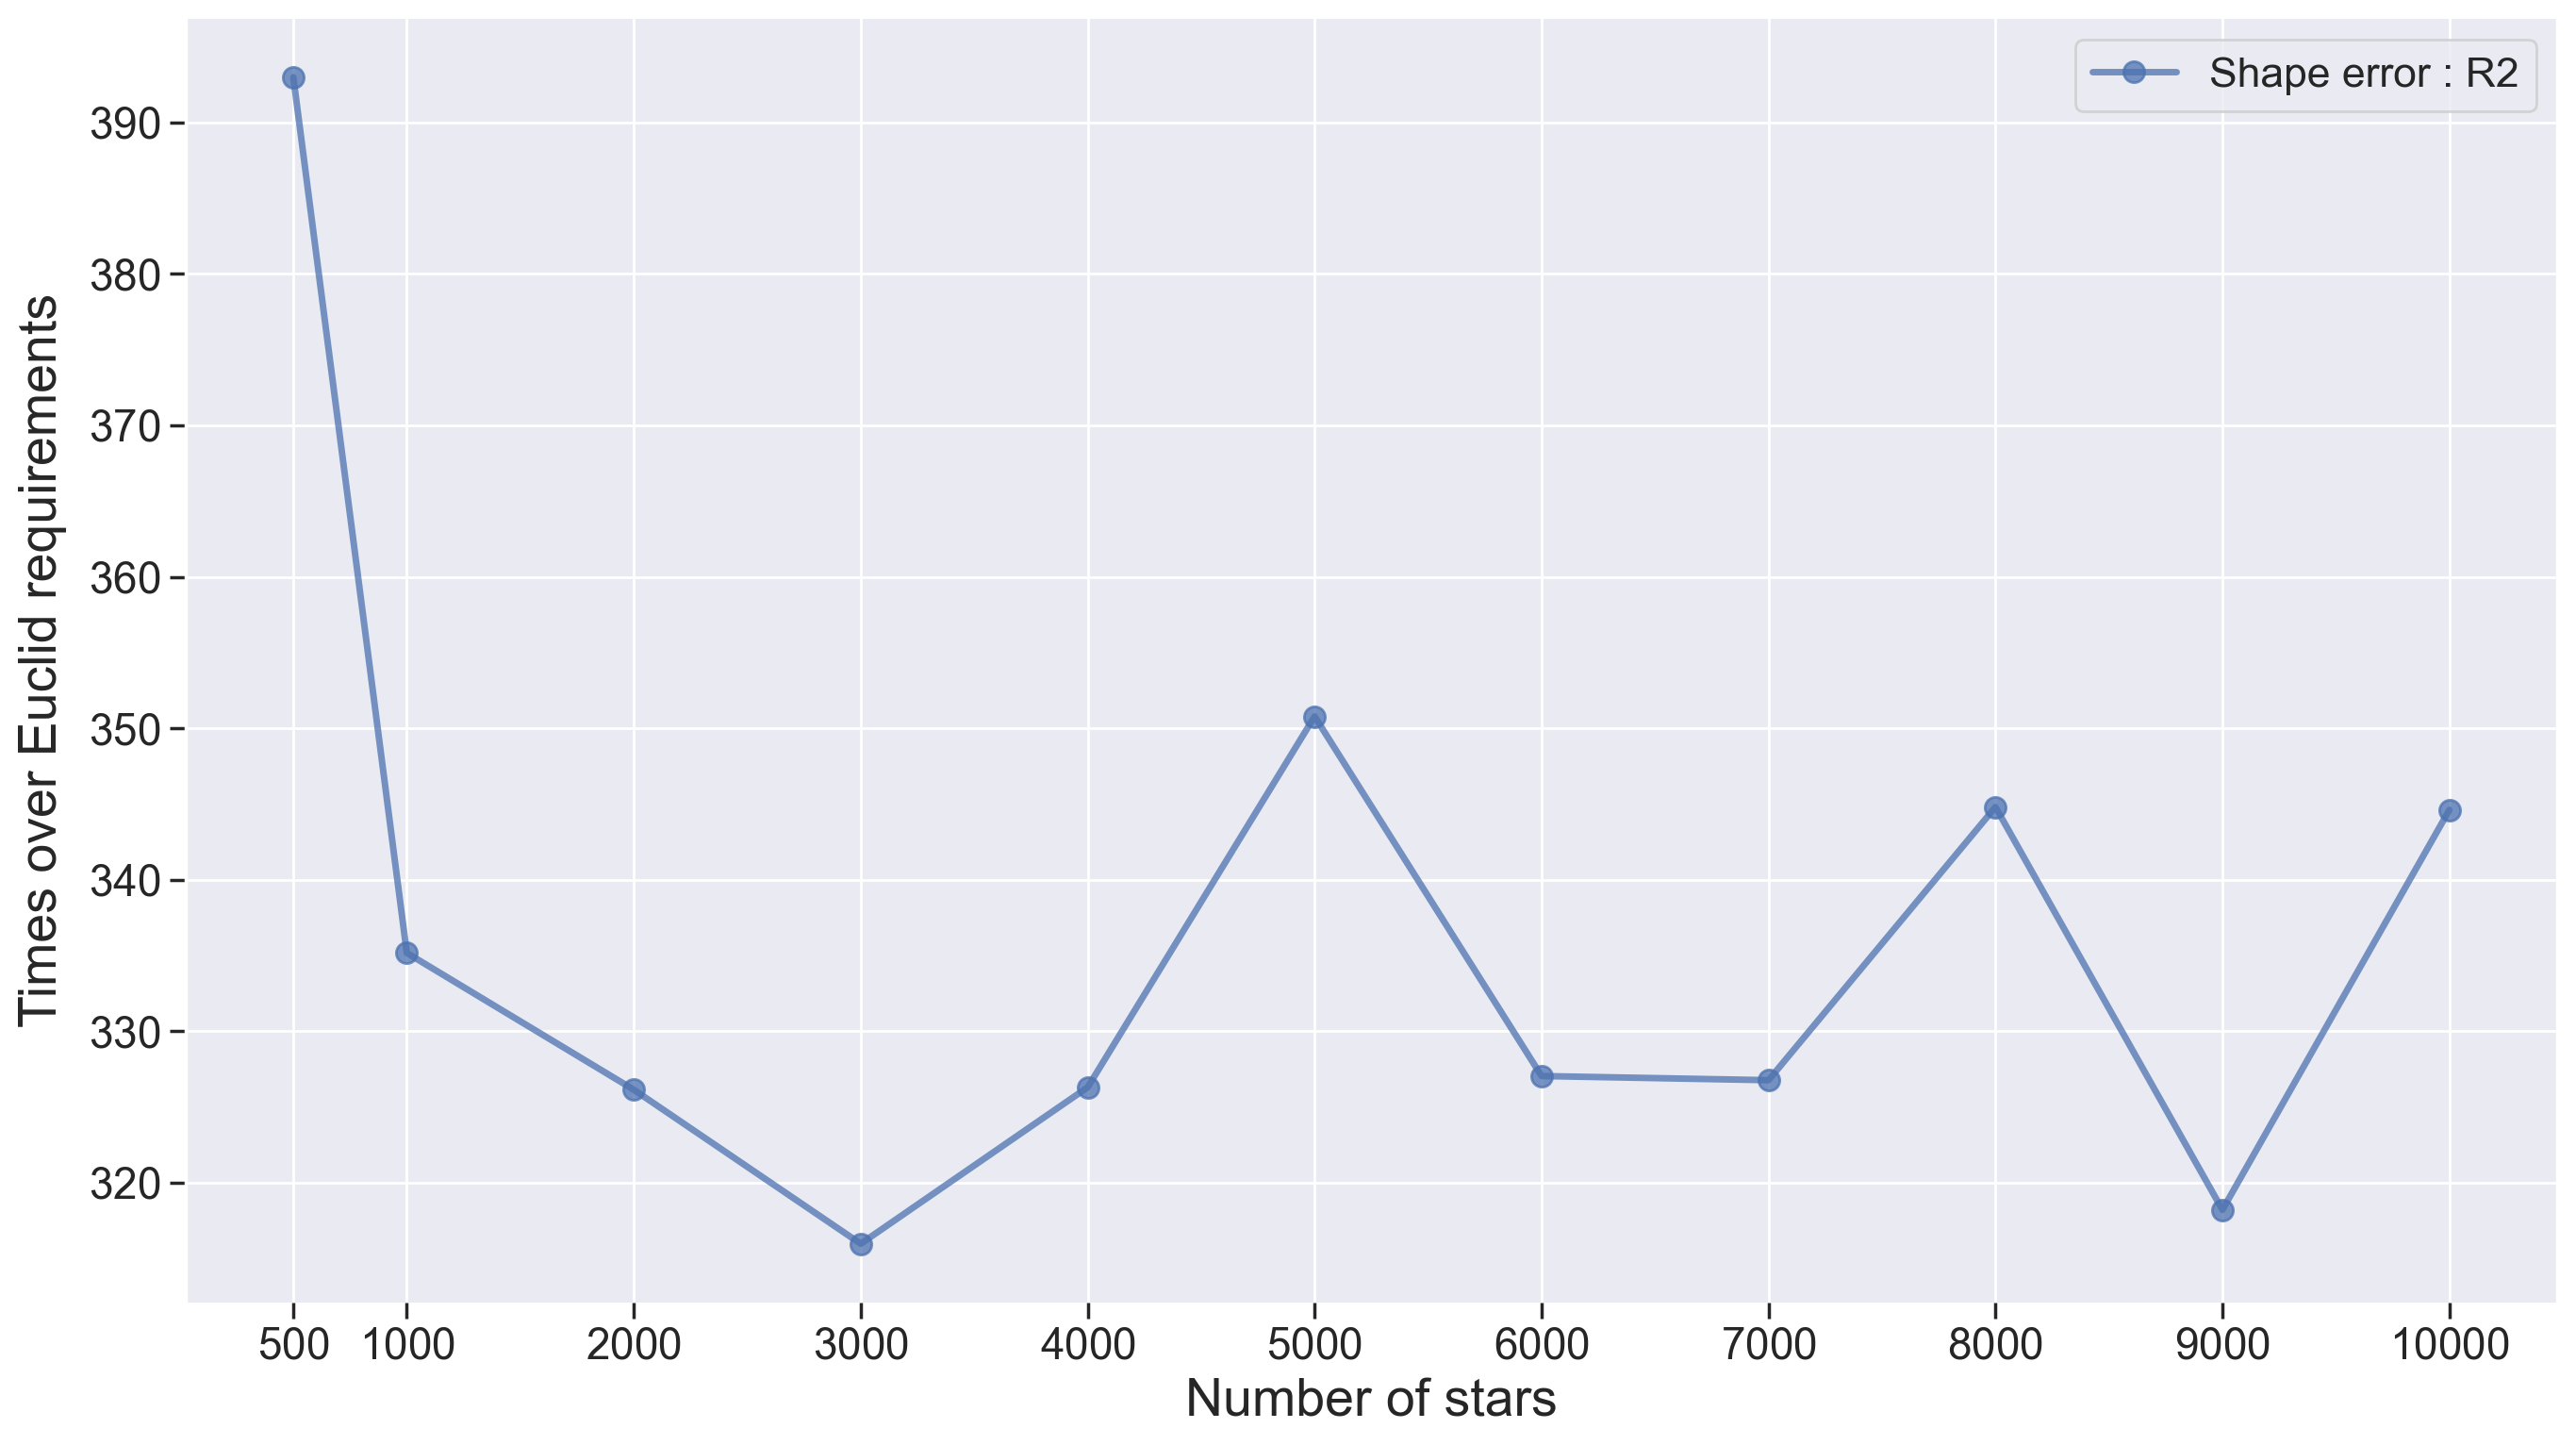

In [23]:
# Define style
define_plot_style()
star_list = n_stars_list
sns.set(font_scale=1.5)


fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot()

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

ax1.plot(star_list, R2[0]/euclid_requirement_R2, label='Shape error : R2', **kwargs)

ax1.legend(prop={'size': 16})#, loc='upper right')

plt.xticks(star_list)


ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()


# plt.minorticks_on()
ax1.yaxis.major.formatter._useMathText = True
ax1.xaxis.major.formatter._useMathText = True

ax1.set_ylabel('Times over Euclid requirements', fontsize = 20)   
ax1.yaxis.set_label_coords(-0.05,0.5, transform=ax1.transAxes)
ax1.set_xlabel('Number of stars', fontsize = 20)


plt.savefig(saving_folder + 'R2_RMSE_vs_NbStars.pdf')
plt.show()